# Predicting students' grades (group, classifications - low, middle, high)

The task is to find the students that will get low grades so that actions can be taken to help them improve. When predicting class/group making sure as many of the actual low-group students as possible are classified as low-group is of importance. Therefore recall will be of significance since we want as few false negatives as possible. Accidentally classifying some students from groups 'middle' or 'high' (grades) does not do any harm. Precision is thus of less significance.  

In [666]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.max_columns = 50

In [667]:
df = pd.read_csv('student-mat.csv')

In [566]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# Column explanation

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – 

secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – 

secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - 1 hour)

studytime - weekly study time (numeric: 1 - 10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [568]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [569]:
# creating new column with avgerage grade over all 3 semesters. rounded to zero decimals.
df['gtot'] = round(((df.G1+df.G2+df.G3)/3),0)

In [570]:
df.gtot.describe()

count    395.000000
mean      10.660759
std        3.719390
min        1.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: gtot, dtype: float64

In [571]:
# creating new column with students categorized with regard to their avg grade.
# 3 groups, low, middle and high, about 1/3 of all students in each group
df['grade_group'] = pd.qcut(df.gtot, [0,0.33,0.66,1], labels=['low', 'middle', 'high' ])

In [572]:
#checking to see if there were any nulls in new column
df.loc[df.grade_group.isna()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gtot,grade_group


In [573]:
# with the avg grades rounded to 0 decimals the groups are not precisely 1/3 each.
df.grade_group.value_counts(normalize=True)

low       0.387342
high      0.321519
middle    0.291139
Name: grade_group, dtype: float64

## EDA

In [574]:
#looking at mean grade in each group
df.groupby('grade_group').gtot.mean()

grade_group
low        6.934641
middle    11.026087
high      14.818898
Name: gtot, dtype: float64

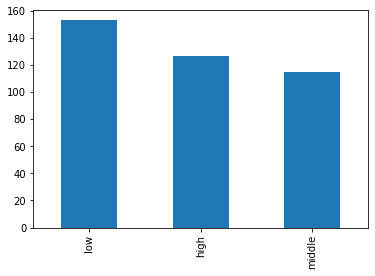

In [575]:
#how many students in each group?
df.grade_group.value_counts().plot(kind='bar')

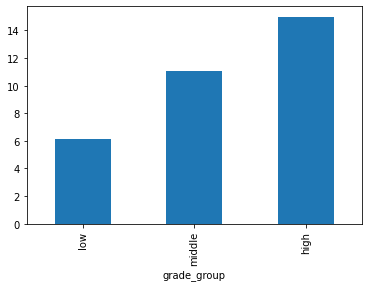

In [255]:
# mean final grade of each group
df.groupby('grade_group').G3.mean().plot(kind='bar')

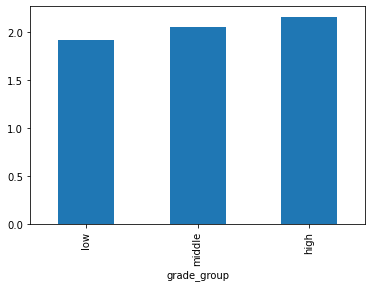

In [256]:
# mean hours per week spent studying per group
df.groupby('grade_group').studytime.mean().plot(kind='bar')

In [257]:
# to be able to look at the students in each group
middle = df.loc[df.grade_group=='middle']
low = df.loc[df.grade_group=='low']
high = df.loc[df.grade_group=='high']

In [258]:
#each groups' avg studytime per week
print('low', low.studytime.mean())
print('middle', middle.studytime.mean())
print('high', high.studytime.mean())




low 1.9150326797385622
middle 2.0521739130434784
high 2.1653543307086616


In [259]:
#studytime is a value of 0-10. Apparently no students spend more than 4 hrs per week studying
df.studytime.nlargest(5)

47    4
66    4
67    4
69    4
70    4
Name: studytime, dtype: int64

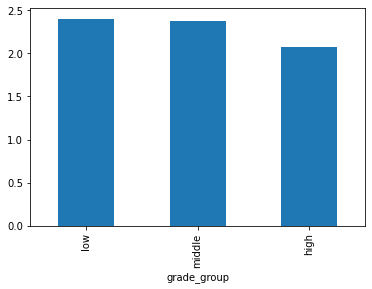

In [260]:
# avg weekend alchol consumption per group. 1 is very low 5 is very high. 
df.groupby('grade_group').Walc.mean().plot(kind='bar')


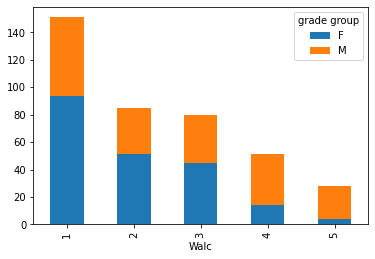

In [261]:
# weekend alcohol consumtion and gender
pd.crosstab(df.Walc, df.sex).plot.bar(stacked=True)
plt.legend(title='grade group')

plt.show()

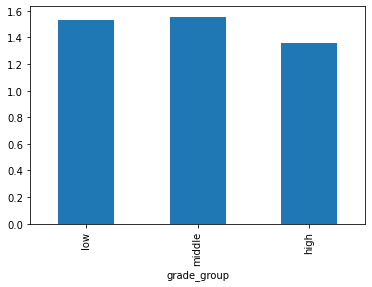

In [262]:
# avg weekday alchol consumption per group. 1 is very low 5 is very high. 
df.groupby('grade_group').Dalc.mean().plot(kind='bar')


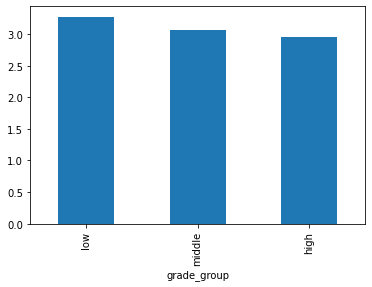

In [263]:
# avg going out with friends per group. 1 is very low, 5 is very high. 
df.groupby('grade_group').goout.mean().plot(kind='bar')


In [264]:
# how many students are in each group 
df.grade_group.value_counts()

low       153
high      127
middle    115
Name: grade_group, dtype: int64

In [265]:
# how students in each group have rated their health (1-5). Interesting how students with high grades have the 
# highest representation at health score = 1
pd.crosstab(df.health, df.grade_group)

grade_group,low,middle,high
health,,,
1,14,12,21
2,18,11,16
3,37,32,22
4,28,17,21
5,56,43,47


In [266]:
# avg helath score of each group. those with high grades have the worst avg health score. 
df.groupby('grade_group').health.mean()

grade_group
low       3.614379
middle    3.591304
high      3.448819
Name: health, dtype: float64

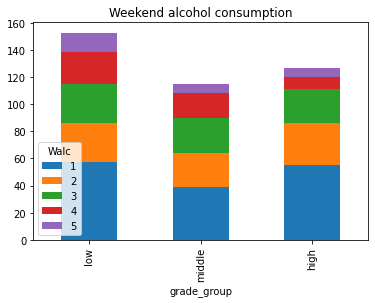

In [591]:
# distribution of groups over different weekend alcohol scores
pd.crosstab(df.grade_group, df.Walc).plot.bar(stacked=True)
plt.legend(title='Walc')
plt.title('Weekend alcohol consumption')

plt.show()

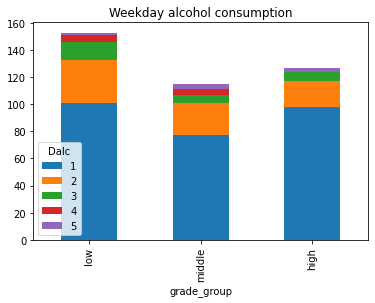

In [592]:
# distribution of groups over different weekday alcohol scores
pd.crosstab(df.grade_group, df.Dalc).plot.bar(stacked=True)
plt.legend(title='Dalc')
plt.title('Weekday alcohol consumption')

plt.show()

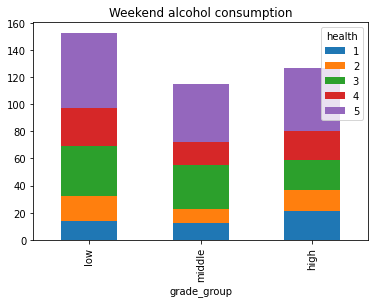

In [590]:
# distribution of groups over different health scores
pd.crosstab(df.grade_group, df.health).plot.bar(stacked=True)
plt.legend(title='health')
plt.title('Group health score')

plt.show()

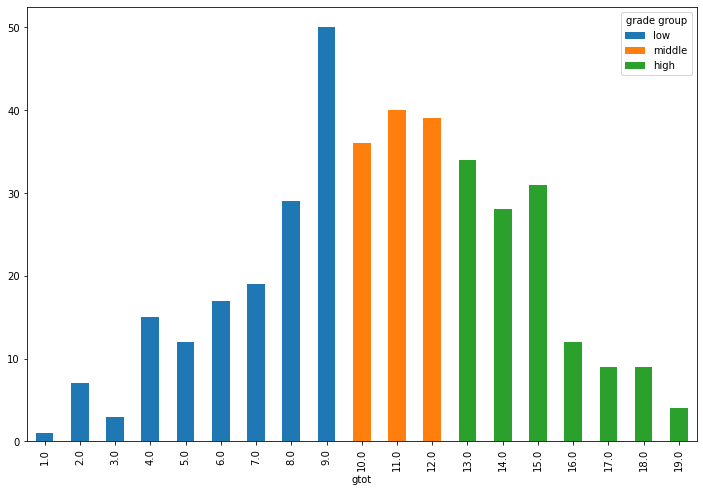

In [268]:
# distribution of gtot (avg grade) for each group
pd.crosstab(df.gtot, df.grade_group).plot.bar(stacked=True, figsize=(12,8))
plt.legend(title='grade group')
plt.show()

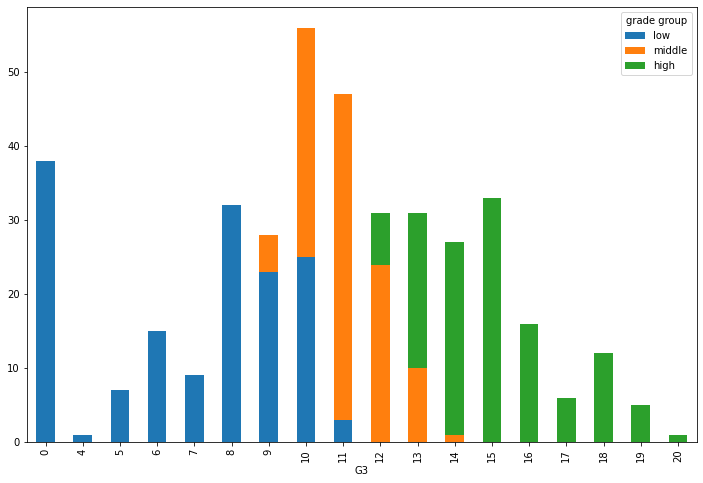

In [269]:
# distribution of G3 (final grade) for each group. 
# evidently some middle-segment-students got a final grade of 9 ( which is a low-group-grade, see previous graph)
# and likewise some low-group-students got a final grade of 10 and 11 which is a middle-group-grade
# and some middle group-students got 13 or 14, which are hogh-group-grades
# and some high-group students got 12, a middle-group-grade

pd.crosstab(df.G3, df.grade_group).plot.bar(stacked=True, figsize=(12,8))
plt.legend(title='grade group')
plt.show()

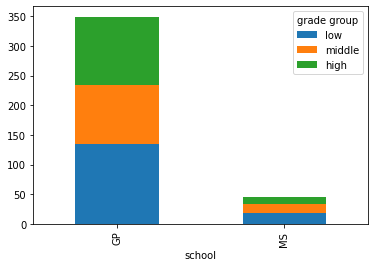

In [270]:
#how many students from each school and what does grade group distribution look like
pd.crosstab(df.school, df.grade_group).plot.bar(stacked=True)
plt.legend(title='grade group')

plt.show()

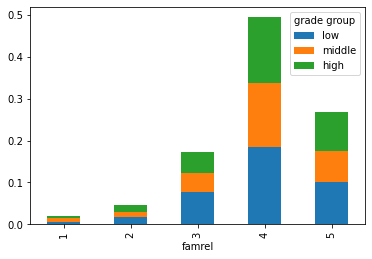

In [271]:
# quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
# and distribution of each group over each quality rating
#  
pd.crosstab(df.famrel, df.grade_group, normalize=True).plot.bar(stacked=True)
plt.legend(title='grade group')

plt.show()

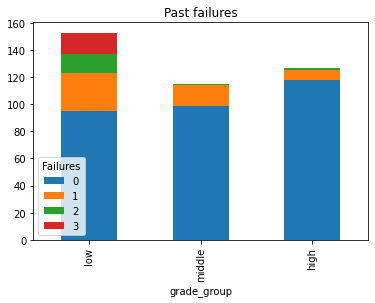

In [589]:
# number of past class failures. grade group dist. 
pd.crosstab(df.grade_group, df.failures).plot.bar(stacked=True)
plt.legend(title='Failures')
plt.title('Past failures')

plt.show()

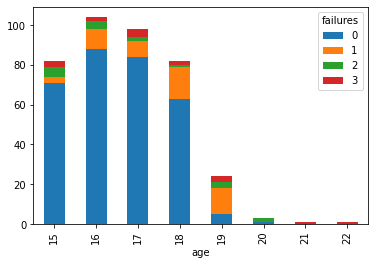

In [273]:
#looking at failures and age
pd.crosstab(df.age, df.failures).plot.bar(stacked=True)
plt.legend(title='failures')

plt.show()

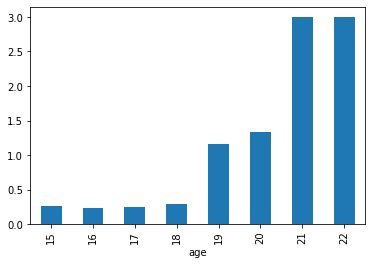

In [274]:
#looking at average failures for each age
df.groupby('age').failures.mean().plot.bar()

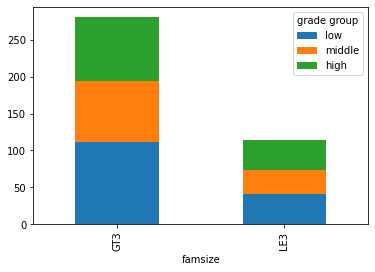

In [275]:
# family size , LE3 = less or equal to 3, GT3= greater than 3.
pd.crosstab(df.famsize, df.grade_group).plot.bar(stacked=True)
plt.legend(title='grade group')

plt.show()

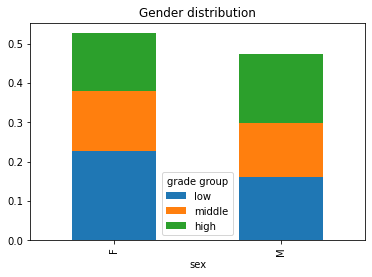

In [576]:
# gender distribution 
pd.crosstab(df.sex, df.grade_group, normalize=True).plot.bar(stacked=True)
plt.legend(title='grade group')
plt.title('Gender distribution')

plt.show()

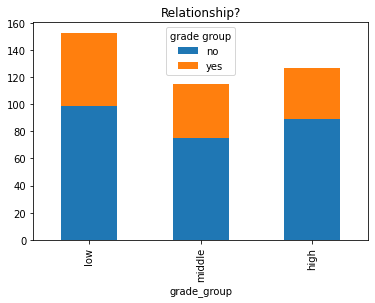

In [583]:
# whether students are in a romantic relationship
pd.crosstab(df.grade_group, df.romantic).plot.bar(stacked=True)
plt.legend(title='grade group')
plt.title('Relationship?')

plt.show()

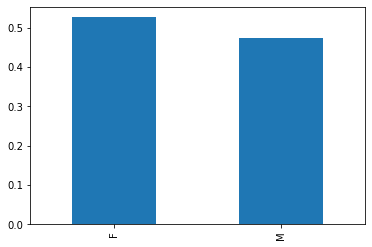

In [278]:
#percentage of each gender in dataset. 
df.sex.value_counts(normalize=True).plot.bar()

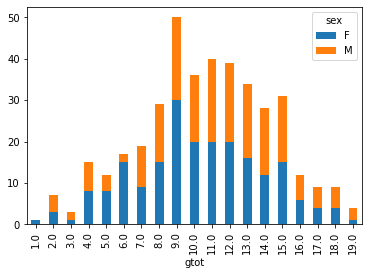

In [577]:
# gender and avg grade. 
pd.crosstab(df.gtot, df.sex).plot.bar(stacked=True)
plt.legend(title='sex')

plt.show()

In [280]:
#on average boys perform better than girls
df.groupby('sex').gtot.mean()

sex
F    10.293269
M    11.069519
Name: gtot, dtype: float64

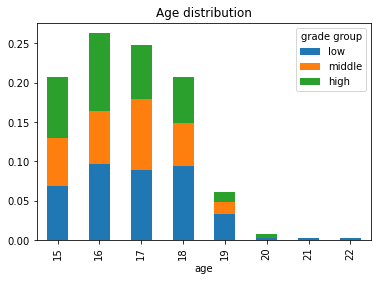

In [580]:
# age and gradae_group
pd.crosstab(df.age, df.grade_group, normalize=True).plot.bar(stacked=True)
plt.legend(title='grade group')
plt.title('Age distribution')

plt.show()

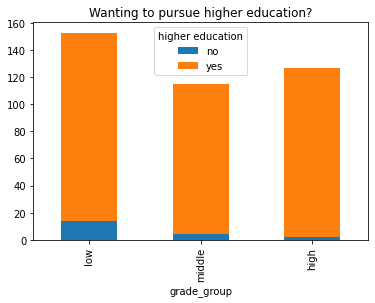

In [579]:
# whether students want to pursue higher education and grade group
pd.crosstab(df.grade_group, df.higher).plot.bar(stacked=True)
plt.legend(title='higher education')
plt.title('Wanting to pursue higher education?')

plt.show()

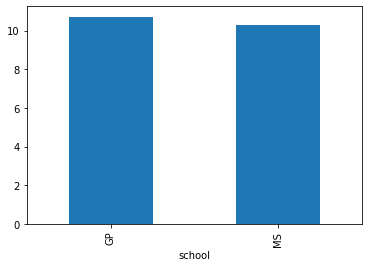

In [283]:
# average mean grade of each school
df.groupby('school').gtot.mean().plot.bar()

## Data Transformation
Making binary columns numerical binary

In [284]:
#famsize, equal or smaller than 3=0, greater than 3 =1
df.famsize = df.famsize.map({'LE3':0, 'GT3':1})

In [285]:
# sex, fem=0 male=1
df.sex = df.sex.map({'F':0, 'M':1})

In [286]:
#school, ms =0, gp=1
df.school = df.school.map({'MS':0, 'GP':1})

In [287]:
#adress rural=0, urban =1
df.address = df.address.map({'R':0, 'U':1})

In [288]:
#pstatus apart=0 toghether = 1
df.Pstatus = df.Pstatus.map({'A':0, 'T':1})

In [289]:
# categories with values no and yes made numerical, no=0, yes=1
cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' ]
for i in cols:
    df[i] = df[i].map({'no':0, 'yes':1})


In [290]:
# checking and noting that there's now  less object columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   school       395 non-null    int64   
 1   sex          395 non-null    int64   
 2   age          395 non-null    int64   
 3   address      395 non-null    int64   
 4   famsize      395 non-null    int64   
 5   Pstatus      395 non-null    int64   
 6   Medu         395 non-null    int64   
 7   Fedu         395 non-null    int64   
 8   Mjob         395 non-null    object  
 9   Fjob         395 non-null    object  
 10  reason       395 non-null    object  
 11  guardian     395 non-null    object  
 12  traveltime   395 non-null    int64   
 13  studytime    395 non-null    int64   
 14  failures     395 non-null    int64   
 15  schoolsup    395 non-null    int64   
 16  famsup       395 non-null    int64   
 17  paid         395 non-null    int64   
 18  activities   395 non-null    i

In [291]:
# since female is 0 and male is 1, there are more females in low and middle and more males in high
df.groupby('grade_group').sex.mean()

grade_group
low       0.411765
middle    0.478261
high      0.543307
Name: sex, dtype: float64

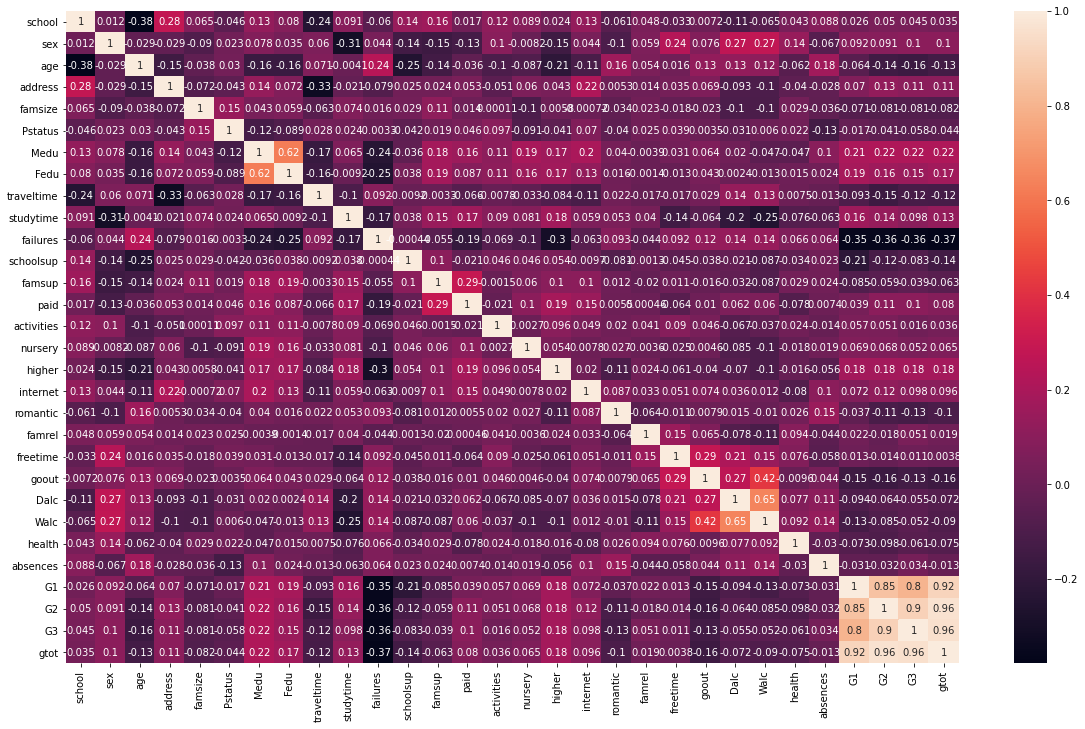

In [292]:
# looking att correlations
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)

#failures (weak) negatively correlated with all grades and with wanitng to pursue higher education asweel as with
#parents education
#weak corr betw failure and age
# neg corr age and school
# weekend and weekday alcohol consumtion corr with gender

In [293]:
df.failures.corr(df.gtot)

-0.3690853753718059

## Creating dummy variables for categorical columns

In [294]:
#getting dummy variables for categorical columns
df1 = pd.get_dummies(df, columns=['Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

In [295]:
#only numeric variables sleft except for target feature, grade_group
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gtot,grade_group,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,0,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,6.0,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,5.0,low,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,8.0,low,0,0,0,0,0,1,0,0,0,1,0,1,0
3,1,0,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,15.0,high,1,0,0,0,0,0,1,0,1,0,0,1,0
4,1,0,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,9.0,low,0,1,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,0,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,9,9.0,low,0,0,1,0,0,0,1,0,0,0,0,0,1
391,0,1,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,15.0,high,0,0,1,0,0,0,1,0,0,0,0,1,0
392,0,1,21,0,1,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,7,8.0,low,0,1,0,0,0,1,0,0,0,0,0,0,1
393,0,1,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,10,11.0,middle,0,0,1,0,0,1,0,0,0,0,0,1,0


In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
#scaling numeric variables that are not binary
col_names = ['age', 'Medu', 'Fedu', 'traveltime','studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
features = df1[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [298]:
#making that change in the df
df1[col_names] = features

In [299]:
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gtot,grade_group,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,0,1.023046,1,1,0,1.143856,1.360371,0.792251,-0.042286,-0.449944,1,0,0,0,1,1,0,0,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934,6.0,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0,0.238380,1,1,1,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,0,1,0,0,0,1,1,0,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934,5.0,low,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,-1.330954,1,0,1,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,1,0,1,0,1,1,1,0,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739,8.0,low,0,0,0,0,0,1,0,0,0,1,0,1,0
3,1,0,-1.330954,1,1,1,1.143856,-0.479857,-0.643249,1.150779,-0.449944,0,1,1,1,1,1,1,1,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004,15.0,high,1,0,0,0,0,0,1,0,1,0,0,1,0
4,1,0,-0.546287,1,1,1,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0,1,1,0,1,1,0,0,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739,9.0,low,0,1,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,2.592380,1,0,0,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,0,1,1,0,1,1,0,0,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,-0.575827,-0.456226,-0.309288,9.0,low,0,0,1,0,0,0,1,0,0,0,0,0,1
391,0,1,0.238380,1,0,1,0.229234,-1.399970,0.792251,-1.235351,-0.449944,0,0,0,0,0,1,1,0,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.932473,1.407091,1.220553,15.0,high,0,0,1,0,0,0,1,0,0,0,0,1,0
392,0,1,3.377047,0,1,1,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,0,0,0,0,0,1,0,0,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,-0.274167,-0.722415,-0.746385,8.0,low,0,1,0,0,0,1,0,0,0,0,0,0,1
393,0,1,1.023046,0,0,1,0.229234,-0.479857,2.227751,-1.235351,-0.449944,0,0,0,0,0,1,1,0,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.027493,0.342338,-0.090739,11.0,middle,0,0,1,0,0,1,0,0,0,0,0,1,0


In [300]:
from sklearn.decomposition import PCA

In [301]:
# performing PCA
pca = PCA(n_components=4)
pc = pca.fit_transform(df1.drop(columns=['grade_group','gtot','G1','G2','G3']))
principalDf = pd.DataFrame(data=pc,
                          columns=['pc1', 'pc2','pc3','pc4'])

principalDf.head()

,pc1,pc2,pc3,pc4
0,-0.869878,0.883569,0.535969,0.744150
1,-0.461010,-2.114589,-0.839456,0.817145
2,1.473903,-2.090501,0.188546,-0.501924
3,-2.452447,0.002237,0.349293,-1.108778
4,-1.224635,0.019504,-0.468904,-0.625359


<BarContainer object of 4 artists>

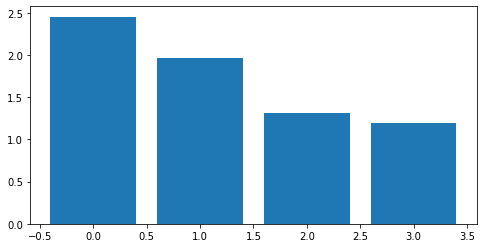

In [302]:
import matplotlib.pyplot as plt
features = range(pca.n_components_)
plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15])

# Model creation

In [303]:
# creating X, getting rid of a few columns since we assume we do not yet know anything about students' grades
X = df1.drop(['G1','G2','G3','gtot','grade_group'], axis=1)


In [304]:
# creating y. making it dummy and into an array
y = np.array(pd.get_dummies(df1.grade_group))

In [318]:
# y, as in column
y_1=df1.grade_group

In [306]:
#importing train_test_split and multiclass classifier
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

In [307]:
#first split. development and test data
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [308]:
# second split. train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2, random_state=123)

In [515]:
#importing different models and pipeline and gridsearch
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

#list of models
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(max_iter=4000, solver='saga'),
    GradientBoostingClassifier(random_state=42)
]
#loop to see which model performs best
for classifier in classifiers:
    pipe = make_pipeline(OneVsRestClassifier(classifier))
    pipe.fit(X_train, y_train)
    print('\n',classifier, pipe.score(X_val, y_val))
    print(' recall:', recall_score(pipe.predict(X_val), y_val, average='weighted'))  


 DecisionTreeClassifier(random_state=42) 0.171875
 recall: 0.3972602739726027

 RandomForestClassifier(random_state=42) 0.25
 recall: 0.5925925925925926

 SVC() 0.203125
 recall: 0.6842105263157895

 KNeighborsClassifier() 0.328125
 recall: 0.4772727272727273

 GaussianNB() 0.296875
 recall: 0.4444444444444444


/Users/ebba/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 LogisticRegression(max_iter=4000, solver='saga') 0.296875
 recall: 0.4878048780487805

 GradientBoostingClassifier(random_state=42) 0.3125
 recall: 0.5217391304347826


In [319]:
#another split where x is not a numpy array
X_dev_1, X_test_1, y_dev_1, y_test_1 = train_test_split(X, y_1, test_size=0.2, random_state=123)

In [320]:
#second split with y not as numpy array
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_dev_1, y_dev_1, test_size=0.2, random_state=123)

In [516]:
# performing another loop to see which model performs best wihtout onevsrest mulsticlass classifier
for classifier in classifiers:
    pipe = make_pipeline(classifier)
    pipe.fit(X_train_1, y_train_1)
    print('\n',classifier, pipe.score(X_val_1, y_val_1))
    print(' recall:', recall_score(pipe.predict(X_val_1), y_val_1, average='weighted')) 


 DecisionTreeClassifier(random_state=42) 0.421875
 recall: 0.421875

 RandomForestClassifier(random_state=42) 0.46875
 recall: 0.46875

 SVC() 0.453125
 recall: 0.453125

 KNeighborsClassifier() 0.46875
 recall: 0.46875

 GaussianNB() 0.453125
 recall: 0.453125

 LogisticRegression(max_iter=4000, solver='saga') 0.421875
 recall: 0.421875

 GradientBoostingClassifier(random_state=42) 0.5
 recall: 0.5


### Creating model with KNeighbors

In [355]:
#creating a model
model = KNeighborsClassifier().fit(X_train_1, y_train_1)

In [357]:
# performing small scale gridsearch and cross validation
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier()

parameters = [{'n_neighbors':[3,5,7], 
               'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]

grid = GridSearchCV(classifier, param_grid=parameters, cv=10) 

In [358]:
#training our model to result from gridsearch
grid.fit(X_train_1, y_train_1)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}])

In [517]:
#looking at how well model performed.
#recall of 64% for low
from sklearn.metrics import classification_report, confusion_matrix 
best = grid.best_estimator_
y_pred = model.predict(X_val_1)
y_pred1 = model.predict(X_train_1)

print(best)
print(recall_score(y_pred1, y_train_1, average=None))
print(classification_report(y_pred, y_val_1))
print(confusion_matrix(y_pred, y_val_1))

GradientBoostingClassifier(learning_rate=0.05, n_estimators=10)
[0.97777778 1.         1.        ]
              precision    recall  f1-score   support

        high       0.67      0.42      0.52        19
         low       0.50      0.64      0.56        25
      middle       0.35      0.35      0.35        20

    accuracy                           0.48        64
   macro avg       0.51      0.47      0.48        64
weighted avg       0.50      0.48      0.48        64

[[ 8  5  6]
 [ 2 16  7]
 [ 2 11  7]]


### SVC

In [361]:
# creating a model
model = SVC().fit(X_train_1, y_train_1)

In [409]:
#small scale gridsearch and cross validation
classifier = SVC()

parameters = [{'C':[0.9, 1, 1.1], 
               'kernel': ['sigmoid', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}]

grid = GridSearchCV(classifier, param_grid=parameters, cv=10) 

In [410]:
#fitting model to gridsearch results
grid.fit(X_train_1, y_train_1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.9, 1, 1.1], 'gamma': ['scale', 'auto'],
                          'kernel': ['sigmoid', 'rbf', 'poly']}])

In [518]:
# how well did the model perform?
#recall of 63% for low
best = grid.best_estimator_
y_pred = best.predict(X_val_1)
y_pred1 = best.predict(X_train_1)

print(best)
print(recall_score(y_pred1, y_train_1, average=None))
print(classification_report(y_pred, y_val_1))
print(confusion_matrix(y_pred, y_val_1))

GradientBoostingClassifier(learning_rate=0.05, n_estimators=10)
[0.57480315 0.63247863 0.875     ]
              precision    recall  f1-score   support

        high       0.83      0.30      0.44        33
         low       0.59      0.63      0.61        30
      middle       0.00      0.00      0.00         1

    accuracy                           0.45        64
   macro avg       0.48      0.31      0.35        64
weighted avg       0.71      0.45      0.52        64

[[10 12 11]
 [ 2 19  9]
 [ 0  1  0]]


### GaussianNB

In [532]:
#creating model
model = GaussianNB().fit(X_train_1, y_train_1)

In [533]:
# how well did the model perform?
#recall of 75% for low
y_pred = model.predict(X_val_1)
y_pred1 = model.predict(X_train_1)


print(recall_score(y_pred1, y_train_1, average=None))
print(classification_report(y_pred, y_val_1))
print(confusion_matrix(y_pred, y_val_1))

[0.50862069 0.68       0.39344262]
              precision    recall  f1-score   support

        high       0.92      0.34      0.50        32
         low       0.47      0.75      0.58        20
      middle       0.15      0.25      0.19        12

    accuracy                           0.45        64
   macro avg       0.51      0.45      0.42        64
weighted avg       0.63      0.45      0.47        64

[[11  8 13]
 [ 1 15  4]
 [ 0  9  3]]


### GradientBoosting

In [523]:
#creating model
model = GradientBoostingClassifier().fit(X_train_1, y_train_1)

In [528]:
#how well did model perform?
# recall of 63% for low
my_pred = model.predict(X_val_1)
y_pred1 = model.predict(X_train_1)


print(recall_score(y_pred1, y_train_1, average=None))
print(classification_report(y_pred, y_val_1))
print(confusion_matrix(y_pred, y_val_1))

[0.97777778 1.         1.        ]
              precision    recall  f1-score   support

        high       0.83      0.30      0.44        33
         low       0.59      0.63      0.61        30
      middle       0.00      0.00      0.00         1

    accuracy                           0.45        64
   macro avg       0.48      0.31      0.35        64
weighted avg       0.71      0.45      0.52        64

[[10 12 11]
 [ 2 19  9]
 [ 0  1  0]]


### RandomForest

In [534]:
#creating model
model = RandomForestClassifier().fit(X_train_1, y_train_1)

In [535]:
#small scale gridserach and cross validation
model = RandomForestClassifier().fit(X_train_1, y_train_1)
classifier = RandomForestClassifier(random_state=4)

parameters = [{'max_depth': [3, 5, 10],
              'n_estimators': [100, 10],
              'max_features':['sqrt', None , 'log2']}]

grid = GridSearchCV(classifier, param_grid=parameters, cv=10) 

In [536]:
#fitting model to frid search results
grid.fit(X_train_1, y_train_1)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=4),
             param_grid=[{'max_depth': [3, 5, 10],
                          'max_features': ['sqrt', None, 'log2'],
                          'n_estimators': [100, 10]}])

In [537]:
grid.score(X_train_1, y_train_1)

0.623015873015873

In [538]:
#how well did model perform?
# 70% recall for low 
best = grid.best_estimator_
y_pred = best.predict(X_val_1)
y_pred1 = best.predict(X_train_1)

print(best)
print(classification_report(y_pred, y_val_1))
print(confusion_matrix(y_pred, y_val_1))

RandomForestClassifier(max_depth=3, max_features='log2', random_state=4)
              precision    recall  f1-score   support

        high       0.92      0.37      0.52        30
         low       0.72      0.70      0.71        33
      middle       0.00      0.00      0.00         1

    accuracy                           0.53        64
   macro avg       0.55      0.35      0.41        64
weighted avg       0.80      0.53      0.61        64

[[11  8 11]
 [ 1 23  9]
 [ 0  1  0]]


# With OneVsRestClassifier

### RandomForest

In [459]:
#classifier. making random tree a multiclass classifier
clf = OneVsRestClassifier(RandomForestClassifier(max_depth=10,random_state=42)).fit(X_train, y_train)

In [460]:
#score of classifier
clf.score(X_val, y_val)

0.25

In [463]:
# how did model perform? 79% recall for low
y_pred = clf.predict(X_val)

print(classification_report(y_pred, y_val))


              precision    recall  f1-score   support

           0       0.34      0.79      0.48        14
           1       0.00      0.00      0.00         1
           2       0.42      0.45      0.43        11

   micro avg       0.25      0.62      0.36        26
   macro avg       0.25      0.41      0.30        26
weighted avg       0.36      0.62      0.44        26
 samples avg       0.25      0.25      0.25        26



/Users/ebba/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GaussianNB

In [464]:
#creating model
clf = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)

In [465]:
clf.score(X_val, y_val)

0.296875

In [530]:
#prediction and checking how well model performed. 80% on recall for low
y_pred = clf.predict(X_val)

print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62        20
           1       0.45      0.29      0.35        31
           2       0.92      0.37      0.52        30

   micro avg       0.56      0.44      0.50        81
   macro avg       0.62      0.49      0.50        81
weighted avg       0.64      0.44      0.48        81
 samples avg       0.56      0.43      0.47        81



/Users/ebba/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNeighbors

In [469]:
# creating model
clf = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train, y_train)

In [470]:
clf.score(X_val, y_val)

0.328125

In [471]:
#predicition and how well model performed. 73% recall for low
y_pred = clf.predict(X_val)

print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.34      0.73      0.47        15
           1       0.15      0.30      0.20        10
           2       0.58      0.37      0.45        19

   micro avg       0.33      0.48      0.39        44
   macro avg       0.36      0.47      0.37        44
weighted avg       0.40      0.48      0.40        44
 samples avg       0.33      0.33      0.33        44



/Users/ebba/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTree

In [481]:
#creating model
clf = OneVsRestClassifier(DecisionTreeClassifier()).fit(X_train, y_train)

In [482]:
clf.score(X_val, y_val)

0.1875

In [483]:
#predicition and performance of model. 61% recall for low
y_pred = clf.predict(X_val)

print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        31
           1       0.30      0.25      0.27        24
           2       0.58      0.33      0.42        21

   micro avg       0.50      0.42      0.46        76
   macro avg       0.49      0.40      0.43        76
weighted avg       0.50      0.42      0.45        76
 samples avg       0.50      0.33      0.39        76



/Users/ebba/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GradientBoosting

In [484]:
#creating model
clf = OneVsRestClassifier(GradientBoostingClassifier()).fit(X_train, y_train)

In [485]:
clf.score(X_val, y_val)

0.3125

In [486]:
#prediction and performance of model. 62% recall for low
y_pred = clf.predict(X_val)

print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.41      0.62      0.49        21
           1       0.15      0.43      0.22         7
           2       0.58      0.44      0.50        16

   micro avg       0.36      0.52      0.43        44
   macro avg       0.38      0.50      0.40        44
weighted avg       0.43      0.52      0.45        44
 samples avg       0.36      0.34      0.34        44



/Users/ebba/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Best Model?
With OneVsRest:GaussianNB OneVsRest performed the best on recall for low-group

Without OneVsRest: GaussianNB performed the best on recall. Random Forest performed the best regarding precision for the low-group and quite well on recall

### OneVsRestClassifier(GaussianNB( ))

In [547]:
clf = OneVsRestClassifier(GaussianNB(var_smoothing=1e-7)).fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62        20
           1       0.45      0.29      0.35        31
           2       0.92      0.37      0.52        30

   micro avg       0.56      0.44      0.50        81
   macro avg       0.62      0.49      0.50        81
weighted avg       0.64      0.44      0.48        81
 samples avg       0.56      0.43      0.47        81



/Users/ebba/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Test Data
For low-group (0) it gave a precision of 52% and recall of 70%

In [548]:
y_pred = clf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.52      0.70      0.60        20
           1       0.48      0.33      0.39        36
           2       0.74      0.41      0.53        49

   micro avg       0.58      0.44      0.50       105
   macro avg       0.58      0.48      0.51       105
weighted avg       0.61      0.44      0.49       105
 samples avg       0.58      0.46      0.50       105



/Users/ebba/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GaussianNB( )

In [601]:
model = GaussianNB().fit(X_train_1, y_train_1)

y_pred = model.predict(X_val_1)
y_pred1 = model.predict(X_train_1)


print(recall_score(y_pred1, y_train_1, average=None))
print(classification_report(y_pred, y_val_1))
print(confusion_matrix(y_pred, y_val_1))

[0.50862069 0.68       0.39344262]
              precision    recall  f1-score   support

        high       0.92      0.34      0.50        32
         low       0.47      0.75      0.58        20
      middle       0.15      0.25      0.19        12

    accuracy                           0.45        64
   macro avg       0.51      0.45      0.42        64
weighted avg       0.63      0.45      0.47        64

[[11  8 13]
 [ 1 15  4]
 [ 0  9  3]]


#### Test Data
for low group it gave precision of 30% and recall of 73%

In [602]:
y_pred = model.predict(X_test_1)

print(classification_report(y_pred, y_test_1))
print(confusion_matrix(y_pred, y_test_1))

              precision    recall  f1-score   support

        high       0.78      0.43      0.55        49
         low       0.30      0.73      0.42        11
      middle       0.20      0.26      0.23        19

    accuracy                           0.43        79
   macro avg       0.42      0.47      0.40        79
weighted avg       0.57      0.43      0.46        79

[[21 10 18]
 [ 1  8  2]
 [ 5  9  5]]


### RandomForestClassifier( )

In [543]:
model = RandomForestClassifier().fit(X_train_1, y_train_1)
classifier = RandomForestClassifier(random_state=4)

parameters = [{'max_depth': [3, 5, 10],
              'n_estimators':[100, 10],
              'max_features':['sqrt', None , 'log2'],
              'min_samples_split':[2,3,4],
               'min_samples_leaf':[1,2]}]

grid = GridSearchCV(classifier, param_grid=parameters, cv=10)

In [544]:
grid.fit(X_train_1, y_train_1)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=4),
             param_grid=[{'max_depth': [3, 5, 10],
                          'max_features': ['sqrt', None, 'log2'],
                          'min_samples_leaf': [1, 2],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [100, 10]}])

In [545]:
best = grid.best_estimator_
y_pred = best.predict(X_val_1)
y_pred1 = best.predict(X_train_1)

print(best)
print(classification_report(y_pred, y_val_1))
print(confusion_matrix(y_pred, y_val_1))

RandomForestClassifier(max_depth=3, max_features='log2', random_state=4)
              precision    recall  f1-score   support

        high       0.92      0.37      0.52        30
         low       0.72      0.70      0.71        33
      middle       0.00      0.00      0.00         1

    accuracy                           0.53        64
   macro avg       0.55      0.35      0.41        64
weighted avg       0.80      0.53      0.61        64

[[11  8 11]
 [ 1 23  9]
 [ 0  1  0]]


#### Test Data
For low-group it gave a precision of 56% and recall of 52%

In [546]:
y_pred = best.predict(X_test_1)

print(classification_report(y_pred, y_test_1))
print(confusion_matrix(y_pred, y_test_1))

              precision    recall  f1-score   support

        high       0.78      0.42      0.55        50
         low       0.56      0.52      0.54        29
      middle       0.00      0.00      0.00         0

    accuracy                           0.46        79
   macro avg       0.44      0.31      0.36        79
weighted avg       0.70      0.46      0.54        79

[[21 12 17]
 [ 6 15  8]
 [ 0  0  0]]


/Users/ebba/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Best Model
GaussianNB gave the best recall for low-group and will in this case be considered the best model

## Exploring result

In [605]:
#probability for each group for each student
model.predict_proba(X)

array([[3.84440587e-03, 1.10787407e-04, 9.96044807e-01],
       [5.27588709e-01, 2.09326648e-01, 2.63084643e-01],
       [6.63716000e-17, 1.00000000e+00, 6.58710575e-11],
       ...,
       [5.44769047e-19, 1.00000000e+00, 5.48654875e-14],
       [1.43310392e-03, 1.05176829e-02, 9.88049213e-01],
       [6.57950124e-02, 6.61913876e-02, 8.68013600e-01]])

In [679]:
#adding as new column
df1['pred'] = model.predict(X)

In [680]:
#getting only group with predicted low grades
res = df1.loc[df1.pred=='low'].copy()
res.drop(columns=['grade_group', 'pred', 'G3', 'G1', 'G2', 'gtot'], inplace=True)
res

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
2,1,0,-1.330954,1,0,1,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,1,0,1,0,1,1,1,0,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,0,0,0,0,0,1,0,0,0,1,0,1,0
4,1,0,-0.546287,1,1,1,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0,1,1,0,1,1,0,0,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,0,1,0,0,0,1,0,0,1,0,0,0,0
14,1,1,-1.330954,1,1,0,-0.685387,-0.479857,-0.643249,1.150779,-0.449944,0,1,0,0,1,1,1,1,0.062194,1.768808,-0.997295,-0.540699,-1.003789,-0.399289,-0.714236,0,1,0,0,0,1,0,0,1,0,0,0,1
17,1,0,-0.546287,1,1,1,0.229234,0.440257,2.227751,-0.042286,-0.449944,1,1,0,1,1,1,0,0,1.178860,-0.236010,-0.997295,-0.540699,-1.003789,0.320890,-0.213796,0,1,0,0,0,1,0,0,0,0,1,1,0
18,1,1,0.238380,1,1,1,0.229234,-0.479857,-0.643249,-1.235351,3.589323,0,1,0,1,1,1,1,0,1.178860,1.768808,1.700867,0.583385,1.328545,1.041070,1.287526,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,0,1.807713,1,0,1,0.229234,-0.479857,0.792251,-0.042286,2.242901,0,0,0,1,1,1,0,1,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,-0.399289,-0.213796,0,0,1,0,0,0,1,0,1,0,0,0,1
376,0,0,2.592380,1,1,1,1.143856,-0.479857,0.792251,1.150779,2.242901,0,1,1,0,0,1,1,1,1.178860,0.766399,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,1,0,0,0,0,1,0,0,0,0,0,0,1
389,0,0,1.023046,1,1,1,-1.600009,-1.399970,0.792251,-0.042286,0.896479,0,0,0,1,1,1,0,0,-3.287804,-2.240828,-1.896683,-0.540699,-1.003789,1.041070,-0.714236,0,1,0,0,0,1,0,0,0,0,0,1,0
390,0,1,2.592380,1,0,0,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,0,1,1,0,1,1,0,0,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,0,0,1,0,0,0,1,0,0,0,0,0,1


In [682]:
#the middle column is the probability for the student ending up in low-group
model.predict_proba(res)

array([[6.63716000e-17, 1.00000000e+00, 6.58710575e-11],
       [2.71070214e-01, 5.57645302e-01, 1.71284484e-01],
       [4.34816304e-01, 5.61982154e-01, 3.20154248e-03],
       [2.65638427e-05, 8.77564757e-01, 1.22408679e-01],
       [9.30580209e-15, 1.00000000e+00, 7.47419004e-11],
       [6.51051613e-07, 9.99570180e-01, 4.29168805e-04],
       [1.23079978e-02, 5.73992496e-01, 4.13699507e-01],
       [1.30975129e-04, 7.60049347e-01, 2.39819678e-01],
       [4.18417090e-05, 9.73543958e-01, 2.64141998e-02],
       [7.36358161e-06, 9.35206480e-01, 6.47861563e-02],
       [1.88989375e-03, 7.29767424e-01, 2.68342682e-01],
       [7.37011746e-04, 7.03707009e-01, 2.95555979e-01],
       [4.33819661e-02, 6.35744699e-01, 3.20873335e-01],
       [1.17556756e-11, 9.99984826e-01, 1.51738837e-05],
       [3.94150892e-18, 9.94770564e-01, 5.22943596e-03],
       [3.38452544e-35, 1.00000000e+00, 5.29891303e-14],
       [1.77228824e-01, 4.91956096e-01, 3.30815081e-01],
       [8.87677261e-05, 9.99633

In [683]:
#creating new column with only probability of student being in low-group
res['prob'] = model.predict_proba(res)[:,1]

In [685]:
#looking at only students with over 80% probabilty in percition of them being in low group
bla.loc[bla.prob > 0.8].describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,prob
count,76.000000,76.000000,76.000000,76.00000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.00000,76.000000,76.000000,76.000000
mean,0.881579,0.407895,0.527467,0.75000,0.710526,0.907895,-0.553008,-0.540391,0.263382,-0.214966,1.427961,0.223684,0.565789,0.276316,0.486842,0.697368,0.776316,0.776316,0.434211,-0.025964,0.027782,0.174275,0.065715,0.111230,-0.058152,0.502295,0.026316,0.486842,0.276316,0.013158,0.013158,0.644737,0.302632,0.0,0.368421,0.052632,0.25000,0.526316,0.328947,0.963303
std,0.325253,0.494709,1.254434,0.43589,0.456532,0.291096,0.892450,0.841094,1.120355,0.796266,1.443106,0.419482,0.498946,0.450146,0.503148,0.462450,0.419482,0.419482,0.498946,1.011400,1.090351,1.099263,0.888729,1.064734,0.944314,1.740257,0.161136,0.503148,0.450146,0.114708,0.114708,0.481773,0.462450,0.0,0.485582,0.224781,0.43589,0.502625,0.472953,0.057804
min,0.000000,0.000000,-1.330954,0.00000,0.000000,0.000000,-2.514630,-1.399970,-0.643249,-1.235351,-0.449944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.287804,-2.240828,-1.896683,-0.540699,-1.003789,-1.839649,-0.714236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.803143
25%,1.000000,0.000000,-0.546287,0.75000,0.000000,1.000000,-1.600009,-1.399970,-0.643249,-1.235351,0.896479,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.062194,-0.236010,-0.997295,-0.540699,-1.003789,-0.579334,-0.714236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.943630
50%,1.000000,0.000000,0.630713,1.00000,1.000000,1.000000,-0.685387,-0.479857,-0.643249,-0.042286,0.896479,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.062194,-0.236010,-0.097908,-0.540699,-0.226345,-0.399289,-0.213796,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.00000,1.000000,0.000000,0.999261
75%,1.000000,1.000000,1.807713,1.00000,1.000000,1.000000,0.229234,0.440257,0.792251,-0.042286,2.242901,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.341361,0.766399,0.801479,0.583385,0.745461,1.041070,1.068583,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.25000,1.000000,1.000000,0.999999
max,1.000000,1.000000,4.161713,1.00000,1.000000,1.000000,1.143856,1.360371,3.663251,2.343844,3.589323,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.178860,1.768808,1.700867,3.955638,2.105989,1.041070,8.669022,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [686]:
from sklearn.inspection import permutation_importance

In [696]:
perm = permutation_importance(model, X, y_1)
perm
#looking at importances of different features. 

{'importances_mean': array([-0.00405063,  0.00556962, -0.00253165, -0.00607595, -0.00405063,
        -0.00658228, -0.00151899,  0.00101266, -0.00962025, -0.01468354,
         0.04405063,  0.01873418, -0.00708861, -0.00151899, -0.00303797,
        -0.01265823,  0.00556962,  0.00303797,  0.00253165, -0.00202532,
        -0.00050633, -0.00860759, -0.00202532, -0.00455696, -0.00303797,
        -0.01063291, -0.00506329, -0.0035443 ,  0.00101266,  0.00050633,
        -0.00455696, -0.00202532, -0.00556962,  0.00050633, -0.00556962,
        -0.00455696, -0.01265823,  0.00101266, -0.00253165]),
 'importances_std': array([0.0085628 , 0.00563824, 0.00620124, 0.00914201, 0.00202532,
        0.00411344, 0.00258178, 0.006118  , 0.00822687, 0.00101266,
        0.01699034, 0.01007582, 0.00189451, 0.00258178, 0.00189451,
        0.00358029, 0.00490904, 0.00628338, 0.00320231, 0.00295238,
        0.00189451, 0.00303797, 0.0024805 , 0.00516356, 0.0024805 ,
        0.01274904, 0.00392201, 0.00411344, 0.00

In [717]:
#getting only mean importance
imp = [perm.importances_mean]
imp = pd.DataFrame(imp).T

In [718]:
#getting features
col = [df.columns]
col = pd.DataFrame(col).T

In [719]:
#making importance column next to feature
col['imp']=imp

In [720]:
#mean importancce of each feature
col

,0,imp
0,school,-0.004051
1,sex,0.005570
2,age,-0.002532
3,address,-0.006076
4,famsize,-0.004051
5,Pstatus,-0.006582
6,Medu,-0.001519
7,Fedu,0.001013
8,Mjob,-0.009620
9,Fjob,-0.014684
